In [2]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

In [3]:
img = cv2.imread('1665409.jpg')

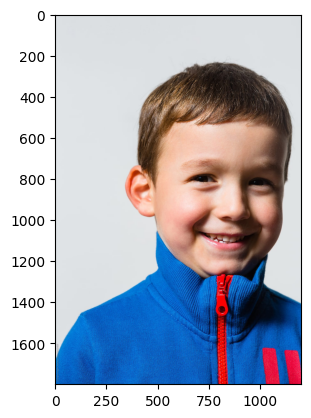

In [4]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [5]:
try:
  predictions= DeepFace.analyze(img)
except:
  print("No face detected")

Action: race: 100%|██████████| 4/4 [00:00<00:00,  4.23it/s]   


In [6]:
predictions

[{'emotion': {'angry': 2.9846022333116286e-23,
   'disgust': 0.0,
   'fear': 2.469069496907574e-31,
   'happy': 100.0,
   'sad': 4.887679863350743e-24,
   'surprise': 1.4535638553859036e-23,
   'neutral': 8.508029214959398e-13},
  'dominant_emotion': 'happy',
  'region': {'x': 453, 'y': 532, 'w': 700, 'h': 700},
  'face_confidence': 11.804843013524078,
  'age': 24,
  'gender': {'Woman': 0.01649653713684529, 'Man': 99.98350143432617},
  'dominant_gender': 'Man',
  'race': {'asian': 71.33591600274539,
   'indian': 0.8866407505655736,
   'black': 0.21046904238873973,
   'white': 15.87153469750492,
   'middle eastern': 1.0051901120060749,
   'latino hispanic': 10.69025088490551},
  'dominant_race': 'asian'}]

In [7]:
type(predictions[0])

dict

In [8]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [9]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w, y+h), (0,255,0),2)

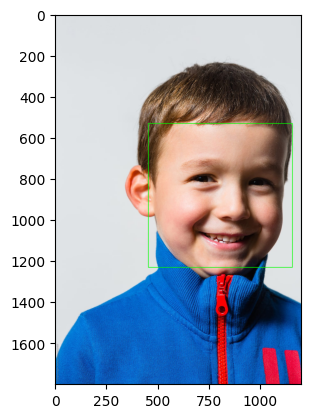

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, predictions[0]['dominant_emotion'],(0,50),font, 10,(0,0,255),2, cv2.LINE_4);

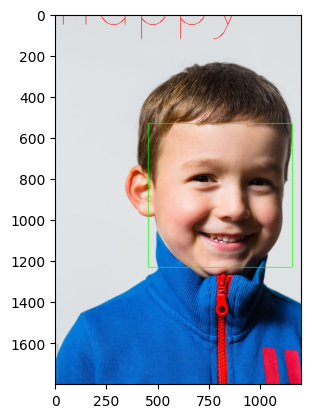

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# Real time face emotion recognition

In [13]:
import cv2

from deepface import DeepFace

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

result = [{'emotion': {'angry': 2.9846022333116286e-23,
   'disgust': 0.0,
   'fear': 2.469069496907574e-31,
   'happy': 100.0,
   'sad': 4.887679863350743e-24,
   'surprise': 1.4535638553859036e-23,
   'neutral': 8.508029214959398e-13},
  'dominant_emotion': 'happy',
  'region': {'x': 453, 'y': 532, 'w': 700, 'h': 700},
  'face_confidence': 11.804843013524078,
  'age': 24,
  'gender': {'Woman': 0.01649653713684529, 'Man': 99.98350143432617},
  'dominant_gender': 'Man',
  'race': {'asian': 71.33591600274539,
   'indian': 0.8866407505655736,
   'black': 0.21046904238873973,
   'white': 15.87153469750492,
   'middle eastern': 1.0051901120060749,
   'latino hispanic': 10.69025088490551},
  'dominant_race': 'asian'}]

while True:

    face_detected = False
    ret,frame = cap.read()

    try:
        result= DeepFace.analyze(frame,actions=['emotion'])
        face_detected = True
    except:
        print("No face detected")
        face_detected = False

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(gray,1.1,4)

    for(x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,255,0),2)

    font = cv2.FONT_HERSHEY_SIMPLEX
    if face_detected:
        cv2.putText(frame, result[0]['dominant_emotion'],(50,100),font, 5,(0,0,255),2, cv2.LINE_4);
    else:
        cv2.putText(frame, "No face detected",(50,100),font, 5,(0,0,255),2, cv2.LINE_4);
    cv2.imshow('Emotion recognition', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    


OpenCV: out device of bound (0-0): 1
OpenCV: camera failed to properly initialize!


No face detected


2024-02-12 14:49:11.746 Python[3564:94047] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


No face detected
No face detected
No face detected
No face detected
